In [1]:
import sys
print(sys.version)

import warnings
warnings.filterwarnings('ignore')

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [2]:
import torch
from torch.utils import data
import torch.nn as nn

In [3]:
cifar_10_folder = './datasets/cifar-10/'
cifar_100_folder = './datasets/cifar-100/'
flower_17_folder = './datasets/flowers-17/'
flower_102_folder = './datasets/flowers-102/'

In [4]:
import dataloaders.Cifar10Dataset as cd10

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
#cudnn.benchmark = True

# Parameters
params = {'batch_size': 32,
          'shuffle': True,
          'num_workers': 2}
max_epochs = 100


# Generators
training_set = cd10.Cifar10Dataset(cifar_10_folder, dataset_type='train', device=device)
training_set.setRotation(True)
training_set.setCrop(True)
training_set.setFlip(True)
training_set.setBlur(True)
training_set.setNoise(True)
training_set.setNormalization(True, 0.5, 0.2)
training_generator = data.DataLoader(training_set, **params)

validation_set = cd10.Cifar10Dataset(cifar_10_folder, dataset_type='val', device=device)
validation_set.setNormalization(True, 0.5, 0.2)
validation_generator = data.DataLoader(validation_set, **params)

test_set = cd10.Cifar10Dataset(cifar_10_folder, dataset_type='test', device=device)
test_set.setNormalization(True, 0.5, 0.2)
test_generator = data.DataLoader(test_set, **params)

In [5]:
import models.CifarModel as cm
    
model = cm.CifarModel('cifar_10',10)
model.to(device)
print(model)

CifarModel(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (block1): ResidualBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): LeakyReLU(negative_slope=0.1)
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): ResidualBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): LeakyReLU(negative_slope=0.1)


In [6]:
model(torch.randn(1,3,32,32).to(device))

tensor([[0.0000, 0.2093, 0.0720, 0.0000, 0.0168, 0.2343, 0.0000, 0.0000, 0.2143,
         0.2253]], device='cuda:0', grad_fn=<ReluBackward>)

40000
10000
10000


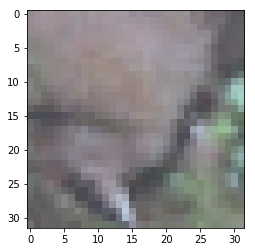

b'bird'


Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7fbc1c408e10>>
Traceback (most recent call last):
  File "/home/adam/.local/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 399, in __del__
    self._shutdown_workers()
  File "/home/adam/.local/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 378, in _shutdown_workers
    self.worker_result_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 345, in get
    return ForkingPickler.loads(res)
  File "/home/adam/.local/lib/python3.5/site-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.5/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.5/multiprocessing/resource_sharer.py", line 87, in get_connection
    c = Client(address, authkey=process.current_proc

In [7]:
print(training_set.__len__())
print(validation_set.__len__())
print(test_set.__len__())

for local_X, local_y in training_generator:
    training_set.plotImage(local_X[0,:,:,:], local_y[0])
    break
#     pass

Epoch 1/100
 Training ... 
 progres: 0.40, loss: 0.063546, acc: 0.30
 progres: 0.80, loss: 0.062643, acc: 0.31
 Validating ... 
 loss: 0.067704, acc: 0.24
 Saving best model!
Epoch 2/100
 Training ... 
 progres: 0.40, loss: 0.057334, acc: 0.37
 progres: 0.80, loss: 0.057311, acc: 0.36
 Validating ... 


No handles with labels found to put in legend.


 loss: 0.098120, acc: 0.15
2 2


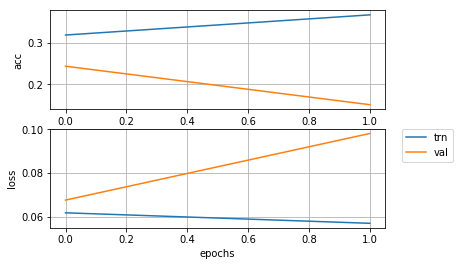

Epoch 3/100
 Training ... 
 progres: 0.40, loss: 0.055591, acc: 0.38
 progres: 0.80, loss: 0.055050, acc: 0.39
 Validating ... 
 loss: 0.055813, acc: 0.37
 Saving best model!
Epoch 4/100
 Training ... 
 progres: 0.40, loss: 0.052997, acc: 0.41
 progres: 0.80, loss: 0.052819, acc: 0.42
 Validating ... 
 loss: 0.048356, acc: 0.48
 Saving best model!
Epoch 5/100
 Training ... 
 progres: 0.40, loss: 0.051465, acc: 0.44
 progres: 0.80, loss: 0.051325, acc: 0.44
 Validating ... 
 loss: 0.058000, acc: 0.38
Epoch 6/100
 Training ... 
 progres: 0.40, loss: 0.048830, acc: 0.46
 progres: 0.80, loss: 0.047626, acc: 0.47
 Validating ... 
 loss: 0.046309, acc: 0.46
 Saving best model!
Epoch 7/100
 Training ... 
 progres: 0.40, loss: 0.045066, acc: 0.49
 progres: 0.80, loss: 0.044638, acc: 0.50
 Validating ... 


No handles with labels found to put in legend.


 loss: 0.040266, acc: 0.54
 Saving best model!
7 7


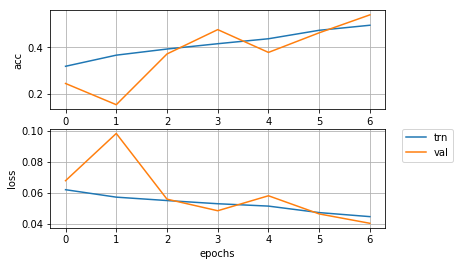

Epoch 8/100
 Training ... 
 progres: 0.40, loss: 0.043208, acc: 0.52
 progres: 0.80, loss: 0.043171, acc: 0.51
 Validating ... 
 loss: 0.051924, acc: 0.43
Epoch 9/100
 Training ... 
 progres: 0.40, loss: 0.042051, acc: 0.53
 progres: 0.80, loss: 0.041975, acc: 0.53
 Validating ... 
 loss: 0.040117, acc: 0.55
 Saving best model!
Epoch 10/100
 Training ... 
 progres: 0.40, loss: 0.041489, acc: 0.54
 progres: 0.80, loss: 0.041190, acc: 0.54
 Validating ... 
 loss: 0.033580, acc: 0.62
 Saving best model!
Epoch 11/100
 Training ... 
 progres: 0.40, loss: 0.040373, acc: 0.55
 progres: 0.80, loss: 0.040313, acc: 0.55
 Validating ... 
 loss: 0.034839, acc: 0.61
Epoch 12/100
 Training ... 
 progres: 0.40, loss: 0.039673, acc: 0.56
 progres: 0.80, loss: 0.039546, acc: 0.56
 Validating ... 


No handles with labels found to put in legend.


 loss: 0.036331, acc: 0.59
12 12


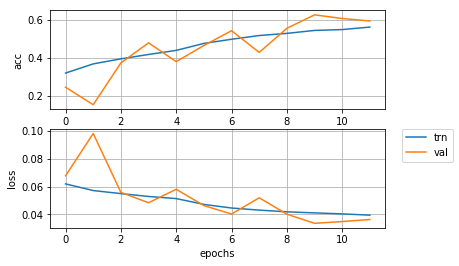

Epoch 13/100
 Training ... 
 progres: 0.40, loss: 0.038670, acc: 0.56
 progres: 0.80, loss: 0.038757, acc: 0.57
 Validating ... 
 loss: 0.035855, acc: 0.60
Epoch 14/100
 Training ... 
 progres: 0.40, loss: 0.038238, acc: 0.57
 progres: 0.80, loss: 0.038166, acc: 0.57
 Validating ... 
 loss: 0.032621, acc: 0.63
 Saving best model!
Epoch 15/100
 Training ... 
 progres: 0.40, loss: 0.037349, acc: 0.58
 progres: 0.80, loss: 0.037380, acc: 0.58
 Validating ... 
 loss: 0.035107, acc: 0.61
Epoch 16/100
 Training ... 
 progres: 0.40, loss: 0.037145, acc: 0.59
 progres: 0.80, loss: 0.037285, acc: 0.58
 Validating ... 
 loss: 0.030644, acc: 0.66
 Saving best model!
Epoch 17/100
 Training ... 
 progres: 0.40, loss: 0.036506, acc: 0.59
 progres: 0.80, loss: 0.036582, acc: 0.59
 Validating ... 


No handles with labels found to put in legend.


 loss: 0.035317, acc: 0.61
17 17


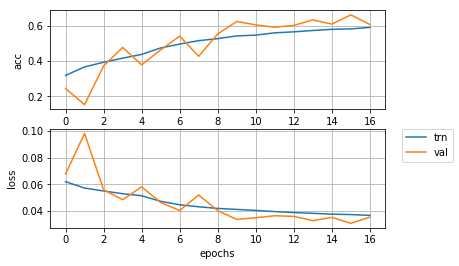

Epoch 18/100
 Training ... 
 progres: 0.40, loss: 0.035973, acc: 0.59
 progres: 0.80, loss: 0.036137, acc: 0.59
 Validating ... 
 loss: 0.029504, acc: 0.67
 Saving best model!
Epoch 19/100
 Training ... 
 progres: 0.40, loss: 0.035632, acc: 0.60
 progres: 0.80, loss: 0.035555, acc: 0.60
 Validating ... 
 loss: 0.029935, acc: 0.67
Epoch 20/100
 Training ... 
 progres: 0.40, loss: 0.035651, acc: 0.60
 progres: 0.80, loss: 0.035242, acc: 0.61
 Validating ... 
 loss: 0.028778, acc: 0.68
 Saving best model!
Epoch 21/100
 Training ... 
 progres: 0.40, loss: 0.034817, acc: 0.61
 progres: 0.80, loss: 0.034713, acc: 0.61
 Validating ... 
 loss: 0.031430, acc: 0.65
Epoch 22/100
 Training ... 
 progres: 0.40, loss: 0.034815, acc: 0.61
 progres: 0.80, loss: 0.034478, acc: 0.62
 Validating ... 


No handles with labels found to put in legend.


 loss: 0.029991, acc: 0.67
22 22


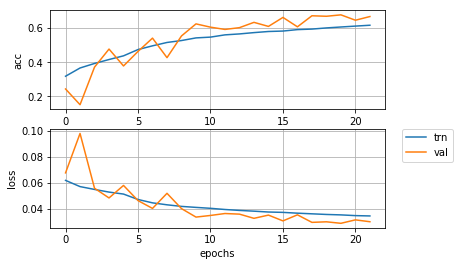

Epoch 23/100
 Training ... 
 progres: 0.40, loss: 0.033546, acc: 0.63
 progres: 0.80, loss: 0.033687, acc: 0.63
 Validating ... 
 loss: 0.027628, acc: 0.70
 Saving best model!
Epoch 24/100
 Training ... 
 progres: 0.40, loss: 0.033281, acc: 0.63
 progres: 0.80, loss: 0.033709, acc: 0.62
 Validating ... 
 loss: 0.026594, acc: 0.70
 Saving best model!
Epoch 25/100
 Training ... 
 progres: 0.40, loss: 0.033640, acc: 0.63
 progres: 0.80, loss: 0.033555, acc: 0.63
 Validating ... 
 loss: 0.028068, acc: 0.69
Epoch 26/100
 Training ... 
 progres: 0.40, loss: 0.033298, acc: 0.63
 progres: 0.80, loss: 0.033171, acc: 0.63
 Validating ... 
 loss: 0.025742, acc: 0.72
 Saving best model!
Epoch 27/100
 Training ... 
 progres: 0.40, loss: 0.032748, acc: 0.64
 progres: 0.80, loss: 0.032722, acc: 0.64
 Validating ... 


No handles with labels found to put in legend.


 loss: 0.026993, acc: 0.70
27 27


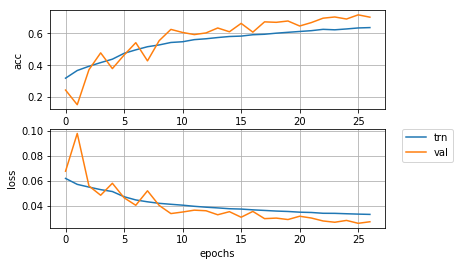

Epoch 28/100
 Training ... 
 progres: 0.40, loss: 0.032426, acc: 0.64
 progres: 0.80, loss: 0.032606, acc: 0.64
 Validating ... 
 loss: 0.026710, acc: 0.71
Epoch 29/100
 Training ... 
 progres: 0.40, loss: 0.031950, acc: 0.64
 progres: 0.80, loss: 0.032256, acc: 0.64
 Validating ... 
 loss: 0.029866, acc: 0.67
Epoch 30/100
 Training ... 
 progres: 0.40, loss: 0.031934, acc: 0.65
 progres: 0.80, loss: 0.032016, acc: 0.64
 Validating ... 
 loss: 0.025324, acc: 0.72
 Saving best model!
Epoch 31/100
 Training ... 
 progres: 0.40, loss: 0.032253, acc: 0.64
 progres: 0.80, loss: 0.031979, acc: 0.64


In [ ]:
import torch.optim as optim
import matplotlib.pyplot as plt

def trainModel(model, train_dataset_gen, val_dataset_gen, criterion, optimizer, num_of_epochs, device):
    
    train_acc = []
    train_loss = []
    val_acc = []
    val_loss = []
    epochs = []
    
    model = model.to(device)
    best_val_loss = sys.float_info.max
    
    
    for epoch in range(num_of_epochs):
        print("Epoch {}/{}".format(epoch+1, num_of_epochs))
        
        for phase in ['train', 'validate']:
            
            cumulated_loss = 0.0
            cumulated_inputs_count = 0
            cumulated_acc = 0.0
            
            if phase == 'train':
                model.train()
                print(" Training ... ")
                
                for i, (inputs, labels) in enumerate(train_dataset_gen,0):
                    inputs, labels = inputs.to(device), labels.to(device)
                
                    optimizer.zero_grad()
                    
                    with torch.set_grad_enabled(True):
            
                        outputs = model(inputs)
                        _, preds = torch.max(outputs,1)
                        loss = criterion(outputs, labels)
                        
                        
                        loss.backward()
                        optimizer.step()
                        
                        cumulated_loss += loss.item()
                        cumulated_inputs_count += inputs.shape[0]
                        cumulated_acc += sum((preds.cpu().numpy() == labels.cpu().numpy()) == True)
                        
                        if((i+1) % 500 == 0):
                            print(' progres: {:.2f}, loss: {:.6f}, acc: {:.2f}'.format(cumulated_inputs_count/training_set.length(), cumulated_loss/cumulated_inputs_count, cumulated_acc/cumulated_inputs_count))
                        
                
                train_acc.append(cumulated_acc/cumulated_inputs_count)
                train_loss.append(cumulated_loss/cumulated_inputs_count)
                        
            else:
                model.eval()
                print(" Validating ... ")
                
                for i, (inputs, labels) in enumerate(validation_generator,0):
                    inputs, labels = inputs.to(device), labels.to(device)
                
                    with torch.set_grad_enabled(False):
            
                        outputs = model(inputs)
                        _, preds = torch.max(outputs,1)
                        loss = criterion(outputs, labels)
                        
                        cumulated_loss += loss.item()
                        cumulated_inputs_count += inputs.shape[0]
                        cumulated_acc += sum((preds.cpu().numpy() == labels.cpu().numpy()) == True)
                        
                val_acc.append(cumulated_acc/cumulated_inputs_count)
                val_loss.append(cumulated_loss/cumulated_inputs_count)
                epochs.append(epoch)
                        
                print(' loss: {:.6f}, acc: {:.2f}'.format(val_loss[-1], val_acc[-1]))
                model.save_model({
                    'epoch': epoch + 1,
                    'state_dict': model.state_dict(),
                }, False)
                
                if(best_val_loss > cumulated_loss/cumulated_inputs_count):
                    best_val_loss = cumulated_loss/cumulated_inputs_count
                    print(' Saving best model!')
                    model.save_model({
                        'epoch': epoch + 1,
                        'state_dict': model.state_dict(),
                    }, True)
                    
        if(epoch % 5 == 1):
            
            fig, axs = plt.subplots(2, 1)
            axs[0].plot(epochs, train_acc, label='trn')
            axs[0].plot(epochs, val_acc, label='val')
            axs[0].grid(True)
            axs[0].set_xlabel('epochs')
            axs[0].set_ylabel('acc')
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            
            axs[1].plot(epochs, train_loss, label='trn')
            axs[1].plot(epochs, val_loss, label='val')
            axs[1].grid(True)
            axs[1].set_xlabel('epochs')
            axs[1].set_ylabel('loss')
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            
            plt.show()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=0.00001)
trainModel(model, training_generator, validation_generator, criterion, optimizer, 100,device)

In [ ]:
model.eval()
print(" Testing ... ")
cumulated_loss = 0.0
cumulated_inputs_count = 0
cumulated_acc = 0.0

for i, (inputs, labels) in enumerate(test_generator,0):
    inputs, labels = inputs.to(device), labels.to(device)

    with torch.set_grad_enabled(False):

        outputs = model(inputs)
        _, preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)

        cumulated_loss += loss.item()
        cumulated_inputs_count += inputs.shape[0]
        cumulated_acc += sum((preds.cpu().numpy() == labels.cpu().numpy()) == True)

print(' loss: {:.6f}, acc: {:.2f}'.format(cumulated_loss/cumulated_inputs_count, cumulated_acc/cumulated_inputs_count))
                  